# Titanic Survival Classification

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12, 10)})

In [12]:
data = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\titanic data.csv')

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



# Numerical Analysis


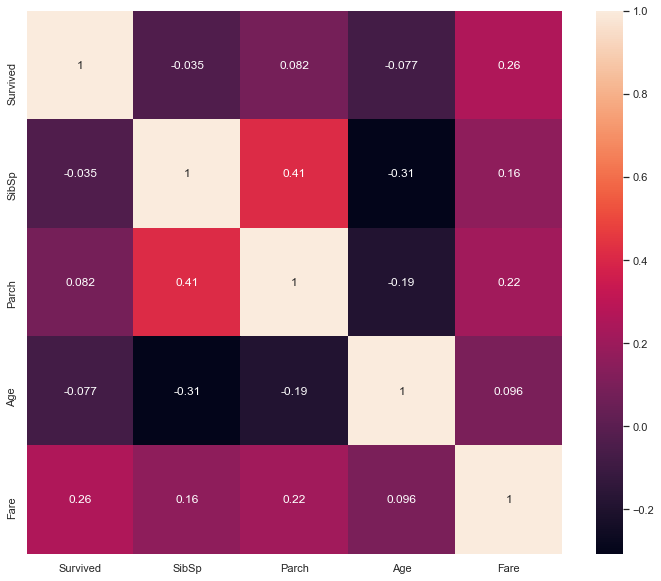

In [19]:
heatmap=sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True)

### SibSp - number of sibilings

In [20]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

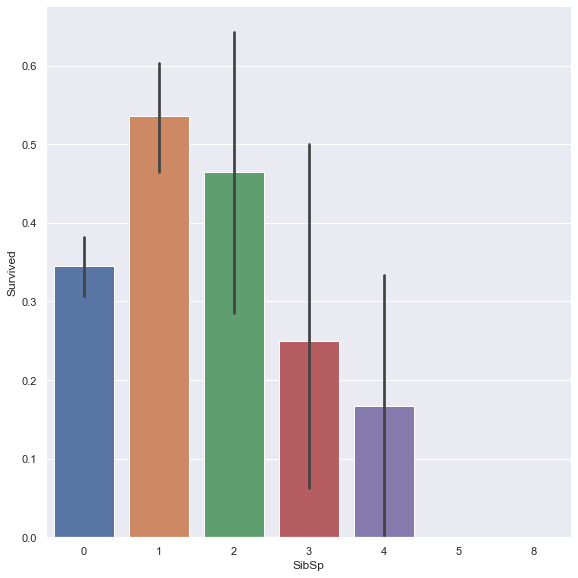

In [25]:
bargraph_sibsp=sns.catplot(x="SibSp",y="Survived",data=data,kind="bar",height=8)

### Age

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


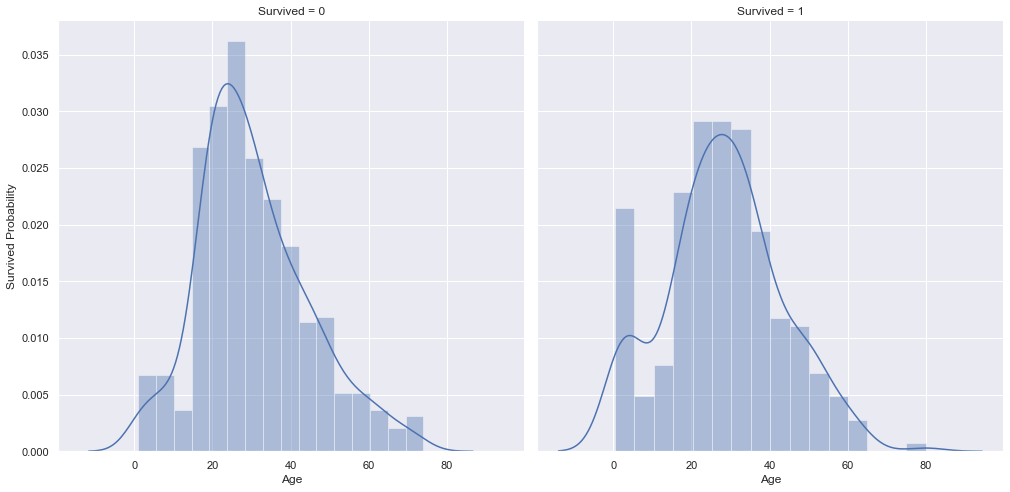

In [28]:
age_visual = sns.FacetGrid(data , col="Survived" ,height =7)
age_visual = age_visual.map(sns.distplot , "Age")
age_visual =age_visual.set_ylabels("Survived Probability")

###  Sex

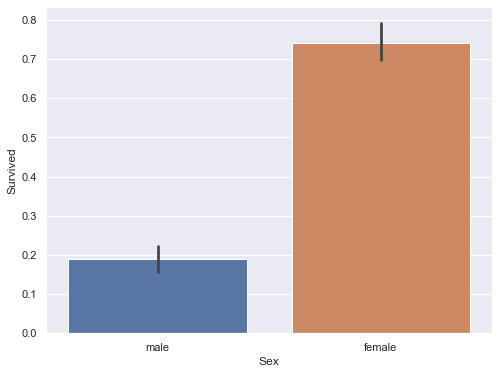

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sex_plot = sns.barplot(x = "Sex", y="Survived",data=data)

In [32]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


###  PClass

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


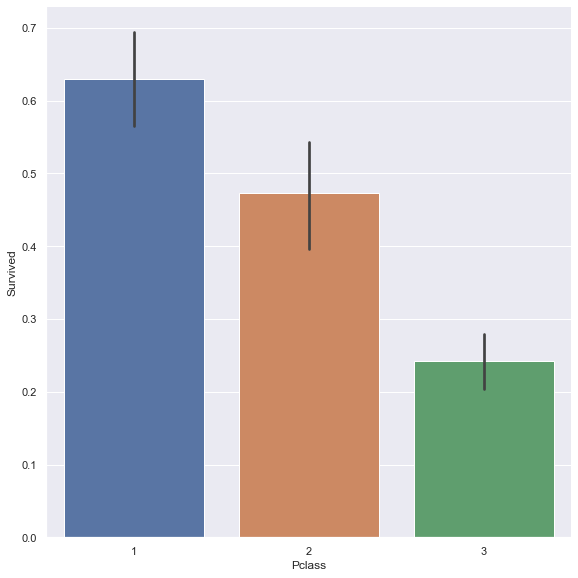

In [33]:
pclass = sns.catplot(x="Pclass" , y="Survived" ,data=data , kind="bar" ,size=8)

###  Survived vs Pclass by sex

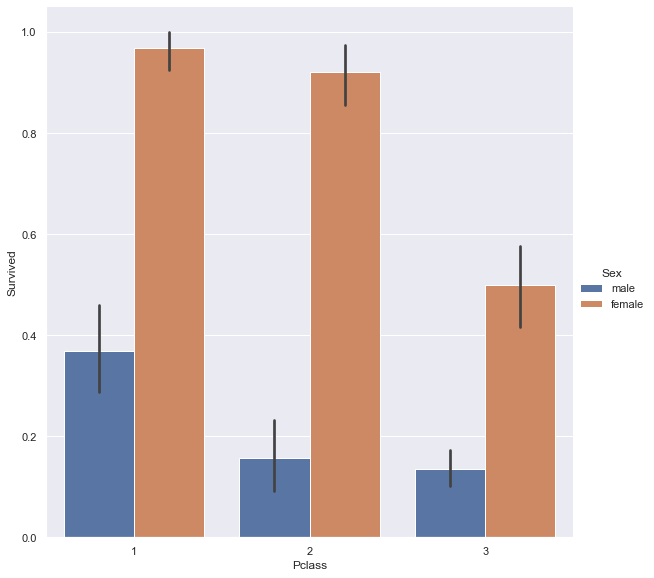

In [35]:
a= sns.catplot(x="Pclass" ,y="Survived" , hue="Sex" ,kind="bar", height=8,data=data)

###  Embarked

In [36]:
data["Embarked"].isnull().sum()

2

In [37]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
data["Embarked"]=data["Embarked"].fillna('S')

In [39]:
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

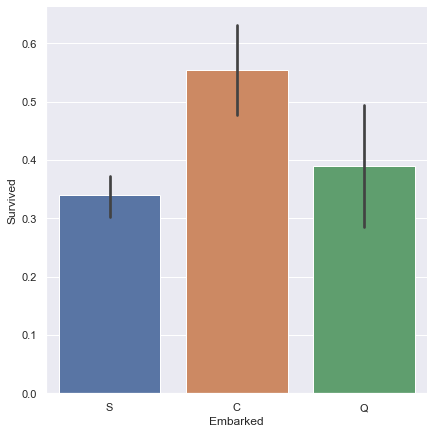

In [41]:
sns.catplot(x="Embarked" , y="Survived" ,height=6, data=data,kind="bar")

###  Let's find the reason why people embarked from station C have high probability of survival

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


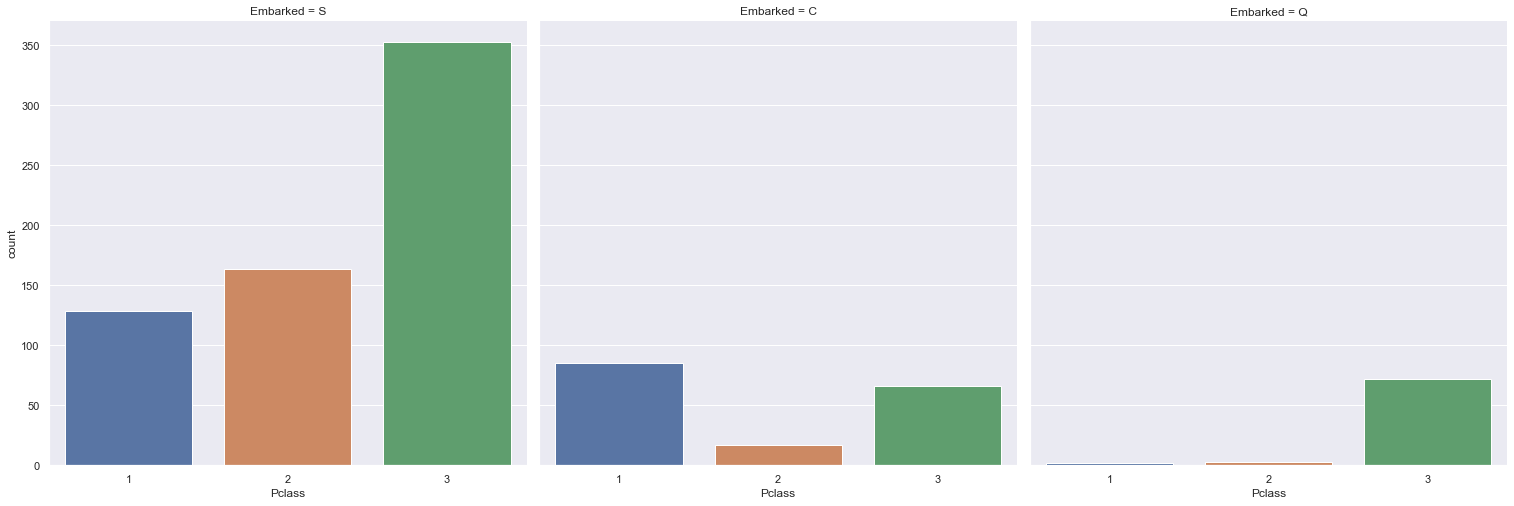

In [42]:
sns.catplot(x="Pclass" , col="Embarked", data=data , kind="count" , size=7)

# Preparing Data

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
mean=data["Age"].mean()
std=data["Age"].std()
is_null=data["Age"].isnull().sum()

rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice=data["Age"].copy()

age_slice[np.isnan(age_slice)]=rand_age
data["Age"]=age_slice

In [52]:
data["Age"].isnull().sum()

0

In [48]:
std

14.526497332334044

In [53]:
data["Embarked"]=data["Embarked"].fillna("S")

In [56]:
col_to_drop=["PassengerId","Name","Ticket","Cabin"]
data.drop(col_to_drop,axis=1,inplace=True)


In [57]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [58]:
gender = {"male":0,"female":1}
data["Sex"]=data["Sex"].map(gender)

In [59]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [60]:
ports = {"S":0 , "C":1 , "Q":2}
data["Embarked"]=data["Embarked"].map(ports)

In [62]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,33.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


#  Splitting Data

In [64]:
x=data.drop(data.columns[[0]],axis=1)
y=data["Survived"]

In [65]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [66]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=0)

 # Feature Scaling 

In [70]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()

xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

In [72]:
xtrain



array([[-1.5325562 , -0.72592065,  1.56031732, ..., -0.47299765,
        -0.12253019, -0.55270799],
       [-1.5325562 ,  1.37756104,  1.41339456, ..., -0.47299765,
         0.91812372,  1.01246055],
       [ 0.84844757, -0.72592065, -2.1127516 , ...,  1.93253327,
         0.29950338, -0.55270799],
       ...,
       [ 0.84844757, -0.72592065,  0.01762837, ..., -0.47299765,
        -0.51276504,  2.5776291 ],
       [ 0.84844757,  1.37756104,  0.45839664, ..., -0.47299765,
        -0.31228976, -0.55270799],
       [-0.34205431, -0.72592065,  2.22146972, ...,  0.72976781,
         0.13566725, -0.55270799]])

# Classification

In [73]:
logres=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier()
rf_classifier=RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0)

In [74]:
logres.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [77]:
pred1=logres.predict(xtest)
pred2=svc_classifier.predict(xtest)
pred3=dt_classifier.predict(xtest)
pred4=knn_classifier.predict(xtest)
pred5=rf_classifier.predict(xtest)


In [81]:
from sklearn.metrics import accuracy_score
print("Accuracy score for Logistic Regression ")
accuracy_score(ytest,pred1)

Accuracy score for Logistic Regression 


0.8059701492537313

In [82]:
print("Accuracy score for Support Vector Regression ")
accuracy_score(ytest,pred2)

Accuracy score for Support Vector Regression 


0.8171641791044776

In [83]:
print("Accuracy score for Decision Tree ")
accuracy_score(ytest,pred3)

Accuracy score for Decision Tree 


0.7649253731343284

In [84]:
print("Accuracy score for KNN ")
accuracy_score(ytest,pred4)

Accuracy score for KNN 


0.8022388059701493

In [85]:
print("Accuracy score for Random Forest ")
accuracy_score(ytest,pred5)

Accuracy score for Random Forest 


0.8246268656716418